In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

import math
from sklearn.preprocessing import MinMaxScaler
# Loading the Apple.Inc Stock Data

import yfinance as yf
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Zadanie 1 - airline-passengers.csv

In [29]:
# df_airline = pd.read_csv('/airline-passengers.csv')
#
# timeseries = df_airline[["Passengers"]].values.astype('float32')
#
# train_size = int(len(timeseries) * 0.67)
# test_size = len(timeseries) - train_size
# train, test = timeseries[:train_size], timeseries[train_size:]
#
# def create_dataset(dataset, lookback):
#     X, y = [], []
#     for i in range(len(dataset)-lookback):
#         feature = dataset[i:i+lookback]
#         target = dataset[i+1:i+lookback+1]
#         X.append(feature)
#         y.append(target)
#     return torch.tensor(X), torch.tensor(y)
#
# lookback = 4
# X_train, y_train = create_dataset(train, lookback=lookback)
# X_test, y_test = create_dataset(test, lookback=lookback)
#
# print(f"Shape of X_train {X_train.shape}")
# print(f"Shape of y_train {y_train.shape}")
# print(f"Shape of X_test {X_test.shape}")
# print(f"Shape of y_test {y_test.shape}")

In [30]:
# class SimpleRNNModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(SimpleRNNModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)
#     def forward(self, x):
#         batch_size = x.size(0)
#         h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
#         out, _ = self.rnn(x, h0)
#         out = self.fc(out)
#         return out
#
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super().__init__()
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
#         self.linear = nn.Linear(hidden_size, output_size)
#     def forward(self, x):
#         x, _ = self.lstm(x)
#         x = self.linear(x)
#         return x
#
# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super().__init__()
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
#         self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True,)
#         self.fc = nn.Linear(hidden_size, output_size)
#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
#         out, _ = self.gru(x, h0)
#         out = self.fc(out)
#         return out

In [31]:
# class SimpleRNNModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(SimpleRNNModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.layer_norm = nn.LayerNorm(hidden_size)  # Dodanie warstwy normalizacji sekwencji
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         batch_size = x.size(0)
#         h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
#         out, _ = self.rnn(x, h0)
#         out = self.layer_norm(out)  # Normalizacja sekwencji
#         out = self.fc(out)
#         return out

# # class SimpleRNNModel(nn.Module):
# #     def __init__(self, input_size, hidden_size, output_size):
# #         super(SimpleRNNModel, self).__init__()
# #         self.hidden_size = hidden_size
# #         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
# #         self.fc = nn.Linear(hidden_size, output_size)
# #         self.batch_norm = nn.BatchNorm1d(hidden_size)  # Przeniesiono warstwę normalizacji poziomu wsadu

# #     def forward(self, x):
# #         batch_size = x.size(0)
# #         h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
# #         out, _ = self.rnn(x, h0)
# #         out = out.permute(0, 2, 1)  # Przeniesienie wymiaru cech na ostatnią pozycję
# #         out = self.batch_norm(out)  # Normalizacja poziomu wsadu
# #         out = out.permute(0, 2, 1)  # Powrót do pierwotnego układu
# #         out = self.fc(out)
# #         return out

# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super(LSTMModel, self).__init__()
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
#         self.layer_norm = nn.LayerNorm(hidden_size)  # Dodanie warstwy normalizacji sekwencji
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.layer_norm(out)  # Normalizacja sekwencji
#         out = self.fc(out)
#         return out

# class GRUModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super(GRUModel, self).__init__()
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
#         self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
#         self.layer_norm = nn.LayerNorm(hidden_size)  # Dodanie warstwy normalizacji sekwencji
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.gru(x, h0)
#         out = self.layer_norm(out)  # Normalizacja sekwencji
#         out = self.fc(out)
#         return out

In [32]:
# rnn_model = SimpleRNNModel(input_size=1, hidden_size=64, output_size=1)
# rnn_criterion = nn.MSELoss()
# rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

In [33]:
# lstm_model = LSTMModel(input_size=1, hidden_size=50, output_size=1, num_layers=1)
# lstm_criterion = nn.MSELoss()
# lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

In [34]:
# gru_model = GRUModel(input_size=1, hidden_size=32, output_size=1, num_layers=2)
# gru_criterion = nn.MSELoss()
# gru_optimizer = optim.Adam(gru_model.parameters(), lr=0.001)

In [35]:
# def train_and_evaluate(epochs, model, criterion, optimizer):
#   loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
#   for epoch in range(epochs):
#       model.train()
#       for X_batch, y_batch in loader:
#           y_pred = model(X_batch)
#           # print("Shape of y_pred:", y_pred.shape)
#           # print("Shape of y_batch:", y_batch.shape)
#           loss = criterion(y_pred, y_batch)
#           optimizer.zero_grad()
#           loss.backward()
#           optimizer.step()
#       if epoch % 100 != 0:
#           continue
#       model.eval()
#       with torch.no_grad():
#           y_pred = model(X_train)
#           train_rmse = np.sqrt(criterion(y_pred, y_train))
#           y_pred = model(X_test)
#           test_rmse = np.sqrt(criterion(y_pred, y_test))
#       print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
#
#   with torch.no_grad():
#       train_plot = np.ones_like(timeseries) * np.nan
#       y_pred = model(X_train)
#       y_pred = y_pred[:, -1, :]
#       train_plot[lookback:train_size] = model(X_train)[:, -1, :]
#       test_plot = np.ones_like(timeseries) * np.nan
#       test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
#   plt.plot(timeseries)
#   plt.plot(train_plot, c='r')
#   plt.plot(test_plot, c='g')
#   plt.show()

In [36]:
# train_and_evaluate(epochs=2000,
#                    model=rnn_model,
#                    criterion=rnn_criterion,
#                    optimizer=rnn_optimizer)

# Epoch 0: train RMSE 225.7353, test RMSE 425.0325
# Epoch 100: train RMSE 59.1459, test RMSE 213.7605
# Epoch 200: train RMSE 44.6640, test RMSE 171.9293
# Epoch 300: train RMSE 37.3645, test RMSE 150.7821
# Epoch 400: train RMSE 31.3965, test RMSE 134.4148
# Epoch 500: train RMSE 24.1065, test RMSE 108.4573
# Epoch 600: train RMSE 21.9340, test RMSE 92.8580
# Epoch 700: train RMSE 20.7059, test RMSE 82.5868
# Epoch 800: train RMSE 20.2659, test RMSE 78.4250
# Epoch 900: train RMSE 19.4177, test RMSE 75.0715
# Epoch 1000: train RMSE 20.0183, test RMSE 78.5263
# Epoch 1100: train RMSE 19.2030, test RMSE 73.1779
# Epoch 1200: train RMSE 19.9895, test RMSE 75.1388
# Epoch 1300: train RMSE 18.5583, test RMSE 70.1264
# Epoch 1400: train RMSE 18.5781, test RMSE 72.3495
# Epoch 1500: train RMSE 18.1114, test RMSE 70.7775
# Epoch 1600: train RMSE 18.4628, test RMSE 73.4882
# Epoch 1700: train RMSE 18.2472, test RMSE 71.9461
# Epoch 1800: train RMSE 17.8393, test RMSE 70.1560
# Epoch 1900: train RMSE 18.1123, test RMSE 71.0983


In [37]:
# train_and_evaluate(epochs=2000,
#                    model=lstm_model,
#                    criterion=lstm_criterion,
#                    optimizer=lstm_optimizer)

# Epoch 0: train RMSE 225.5587, test RMSE 424.7512
# Epoch 100: train RMSE 63.6003, test RMSE 226.6145
# Epoch 200: train RMSE 29.9618, test RMSE 138.4573
# Epoch 300: train RMSE 22.9287, test RMSE 106.0481
# Epoch 400: train RMSE 22.6078, test RMSE 96.7826
# Epoch 500: train RMSE 21.1609, test RMSE 86.1510
# Epoch 600: train RMSE 21.7435, test RMSE 81.8668
# Epoch 700: train RMSE 20.5830, test RMSE 82.9309
# Epoch 800: train RMSE 21.1752, test RMSE 80.1647
# Epoch 900: train RMSE 20.3195, test RMSE 79.7447
# Epoch 1000: train RMSE 21.9503, test RMSE 80.5920
# Epoch 1100: train RMSE 20.4899, test RMSE 77.5096
# Epoch 1200: train RMSE 19.6465, test RMSE 79.7934
# Epoch 1300: train RMSE 19.6423, test RMSE 78.1463
# Epoch 1400: train RMSE 19.6836, test RMSE 80.1578
# Epoch 1500: train RMSE 19.8149, test RMSE 76.4478
# Epoch 1600: train RMSE 19.7237, test RMSE 81.9803
# Epoch 1700: train RMSE 21.3886, test RMSE 76.0815
# Epoch 1800: train RMSE 20.1704, test RMSE 80.1512
# Epoch 1900: train RMSE 19.1968, test RMSE 81.4291

In [38]:
# train_and_evaluate(epochs=2000,
#                    model=gru_model,
#                    criterion=gru_criterion,
#                    optimizer=gru_optimizer)

# Epoch 0: train RMSE 224.2260, test RMSE 423.4503
# Epoch 100: train RMSE 84.6033, test RMSE 263.2314
# Epoch 200: train RMSE 33.4953, test RMSE 159.6780
# Epoch 300: train RMSE 25.3266, test RMSE 120.6184
# Epoch 400: train RMSE 23.5313, test RMSE 102.8712
# Epoch 500: train RMSE 21.0925, test RMSE 99.9077
# Epoch 600: train RMSE 19.7442, test RMSE 107.3747
# Epoch 700: train RMSE 23.3529, test RMSE 102.5431
# Epoch 800: train RMSE 18.9202, test RMSE 116.0674
# Epoch 900: train RMSE 18.5829, test RMSE 104.9573
# Epoch 1000: train RMSE 18.5540, test RMSE 104.7577
# Epoch 1100: train RMSE 20.7297, test RMSE 113.0225
# Epoch 1200: train RMSE 17.7724, test RMSE 102.7524
# Epoch 1300: train RMSE 17.8653, test RMSE 105.9113
# Epoch 1400: train RMSE 18.6878, test RMSE 105.6229
# Epoch 1500: train RMSE 17.4760, test RMSE 96.6621
# Epoch 1600: train RMSE 17.4643, test RMSE 100.0324
# Epoch 1700: train RMSE 18.7996, test RMSE 101.5382
# Epoch 1800: train RMSE 17.2781, test RMSE 97.4061
# Epoch 1900: train RMSE 17.4518, test RMSE 100.4455

# Zadanie 2 - Apple, Google, Amazon Stock Data

In [39]:
end_date =  date.today().strftime("%Y-%m-%d") #end date for our data retrieval will be current date
start_date = '1990-01-01' # Beginning date for our historical data retrieval

df_APPL = yf.download('AAPL', start=start_date, end=end_date)# Function used to fetch the data
df_GOOG = yf.download('GOOG', start=start_date, end=end_date)# Function used to fetch the data
df_AMZN = yf.download('AMZN', start=start_date, end=end_date)# Function used to fetch the data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [40]:
def data_plot(df):
    df_plot = df.copy()

    ncols = 2
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,
                           sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

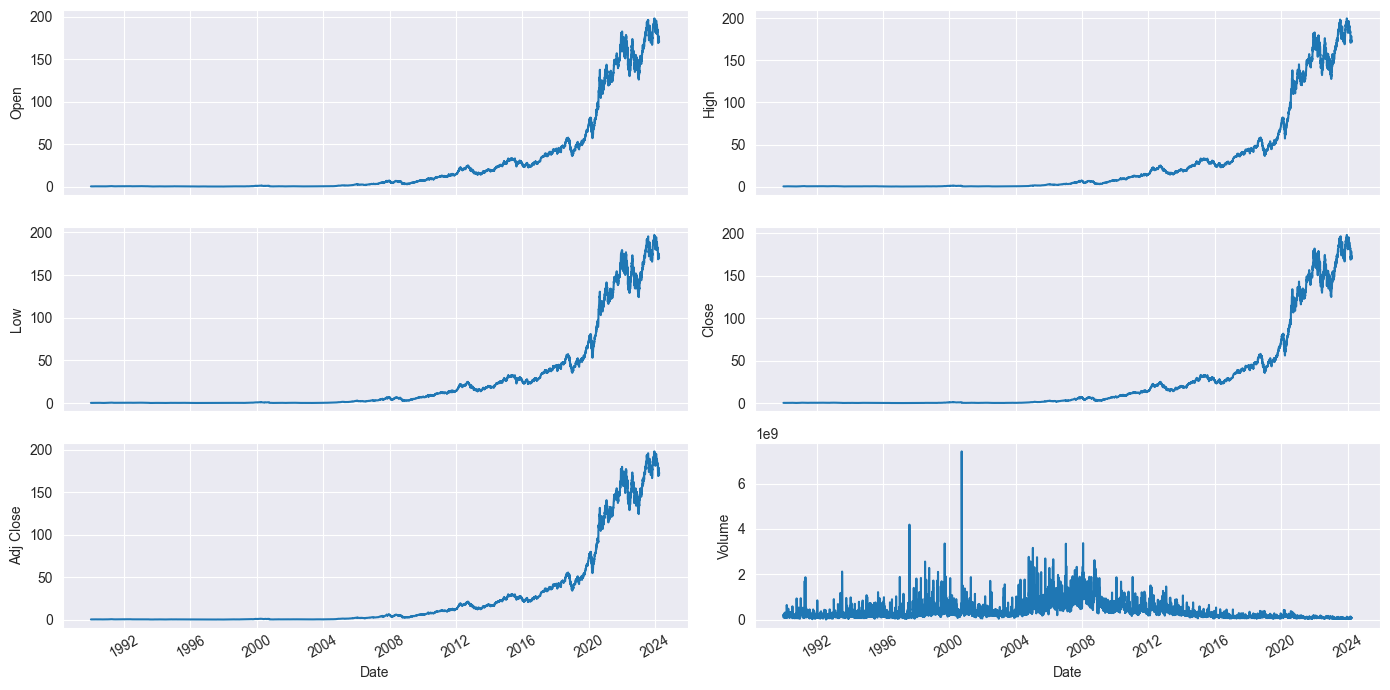

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263078,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264843,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265727,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266610,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268375,101572800
...,...,...,...,...,...,...
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.279999,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.850006,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400


In [41]:
data_plot(df_APPL)
df_APPL

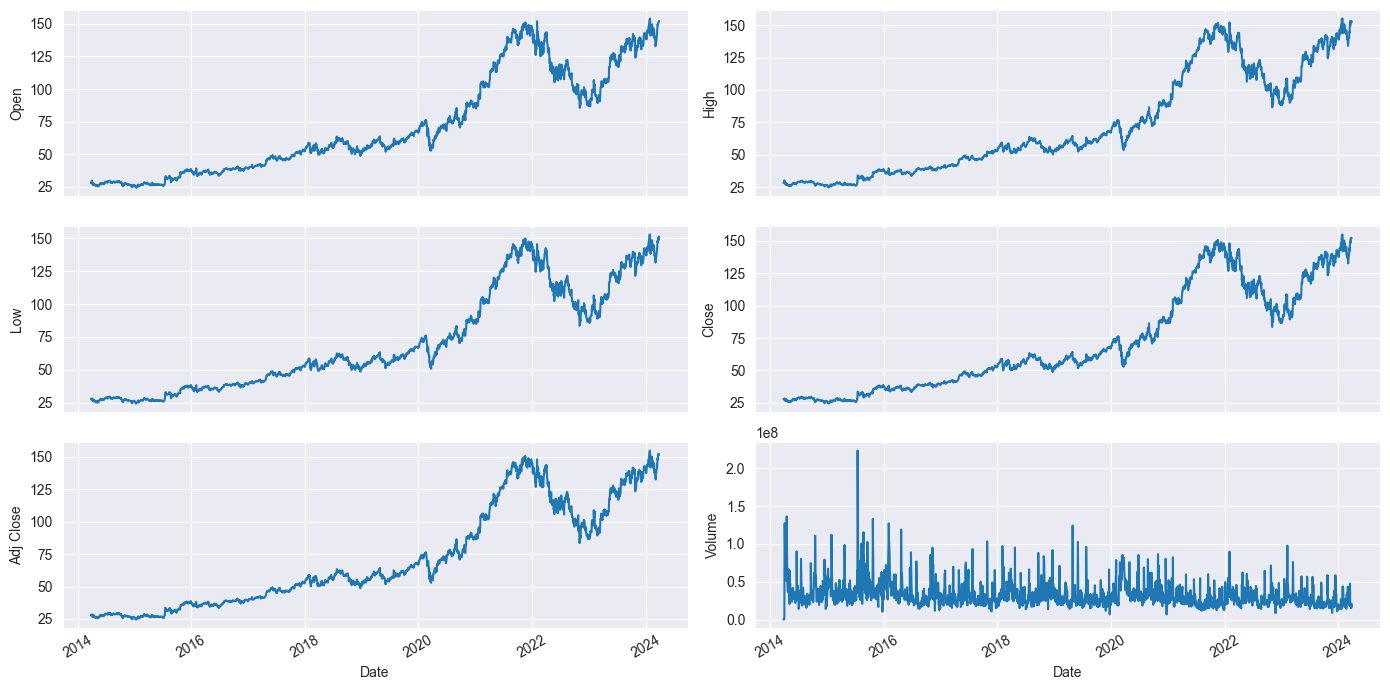

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.846546,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.922838,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.772251,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055
...,...,...,...,...,...,...
2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300
2024-03-25,150.949997,151.455994,148.800003,151.149994,151.149994,15114700
2024-03-26,151.240005,153.199997,151.029999,151.699997,151.699997,19312700


In [42]:
data_plot(df_GOOG)
df_GOOG

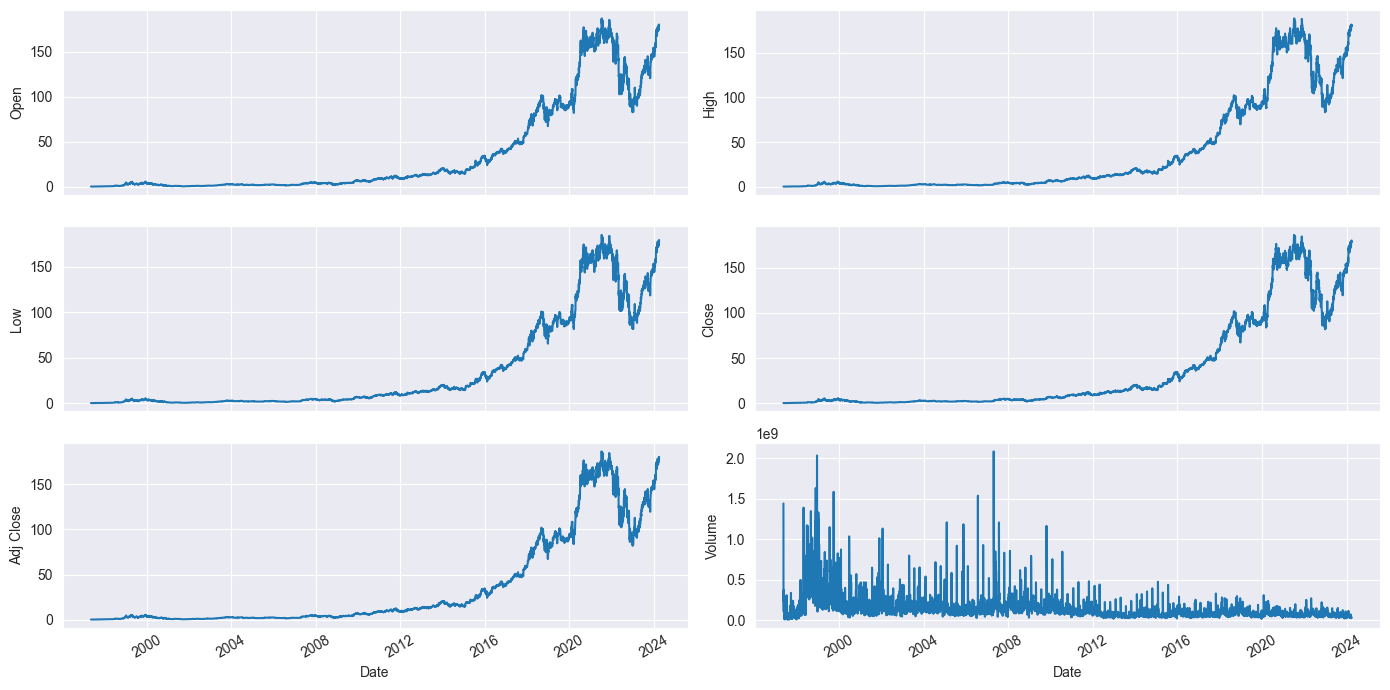

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000


In [43]:
data_plot(df_AMZN)
df_AMZN

In [44]:
class RNNModel_apple(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout=0.2, weight_decay=0.001):
        super(RNNModel_apple, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        self.weight_decay = weight_decay

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(1, batch_size, self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.layer_norm(out)
        out = torch.relu(out)
        out = self.dropout(out)  # Applying dropout before fully connected layer
        out = self.fc(out)
        return out

In [45]:
def prepare_data(df):
  # Splitting the data into training and testing sets
  # Allocating 80% of the data for training
  training_data_length = math.ceil(len(df) * 0.8)

  # Splitting the dataset
  training_data = df.iloc[:training_data_length, :1]
  testing_data = df.iloc[training_data_length:, :1]

  print("Shape of training data:", training_data.shape)
  print("Shape of testing data:", testing_data.shape)

  # Choosing the 'Open' price values for training
  training_data_open = training_data.Open.values.reshape(-1, 1)
  # Choosing the 'Open' price values for testing
  testing_data_open = testing_data.Open.values.reshape(-1, 1)

  # Scaling the data using MinMaxScaler
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_training_data = scaler.fit_transform(training_data_open)
  scaled_testing_data = scaler.transform(testing_data_open)

  print("Shape of scaled training data:", scaled_training_data.shape)
  print("Shape of scaled testing data:", scaled_testing_data.shape)

  # Defining the sequence length
  sequence_length = 50  # Number of time steps for backward analysis

  # Creating sequences and labels for training data
  X_train, y_train = [], []
  for i in range(len(scaled_training_data) - sequence_length):
      X_train.append(scaled_training_data[i:i+sequence_length])
      y_train.append(scaled_training_data[i+1:i+sequence_length+1])

  # Converting lists to numpy arrays
  X_train, y_train = np.array(X_train), np.array(y_train)

  # Converting data to PyTorch tensors
  X_train = torch.tensor(X_train, dtype=torch.float32)
  y_train = torch.tensor(y_train, dtype=torch.float32)

  print("Shape of X_train:", X_train.shape)
  print("Shape of y_train:", y_train.shape)

  # Create sequences and labels for testing data
  sequence_length = 30  # Number of time steps to look back
  X_test, y_test = [], []
  for i in range(len(scaled_testing_data) - sequence_length):
      X_test.append(scaled_testing_data[i:i+sequence_length])
      y_test.append(scaled_testing_data[i+1:i+sequence_length+1])
  X_test, y_test = np.array(X_test), np.array(y_test)

  # Convert data to PyTorch tensors
  X_test = torch.tensor(X_test, dtype=torch.float32)
  y_test = torch.tensor(y_test, dtype=torch.float32)
  print("Shape of X_test:", X_test.shape)
  print("Shape of y_test:", y_test.shape)

  batch_size = 16
  # Create DataLoader for batch training
  train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

  # Create DataLoader for batch training
  test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  return X_train, y_train, X_test, y_test, train_loader, test_loader

In [51]:
def train_and_evaluate(epochs, model, criterion, optimizer,  X_train, y_train, X_test, y_test, train_loader, test_loader):
    best_test_loss = float('inf')
    counter = 0
    patience = 10
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        # if epoch % 100 != 0:
        #     continue

        model.eval()
        with torch.no_grad():
            train_rmse = evaluate_model(model, criterion, X_train, y_train)
            test_rmse = evaluate_model(model, criterion, X_test, y_test)

        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

        # Early stopping based on test loss
        if test_rmse < best_test_loss:
            best_test_loss = test_rmse
            counter = 0
        else:
            counter += 1

        if counter >= patience:
            print(f'Early stopping after epoch {epoch}.')
            break

    plot_results(model, X_train, X_test, y_train, y_test)

def evaluate_model(model, criterion, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = model(X)
        rmse = np.sqrt(criterion(y_pred, y))
    return rmse

def plot_results(model, X_train, X_test, y_train, y_test):
    with torch.no_grad():
        train_plot = np.ones_like(y_train) * np.nan
        train_pred = model(X_train)
        train_plot = train_pred[:, -1]

        test_plot = np.ones_like(y_test) * np.nan
        test_pred = model(X_test)
        test_plot = test_pred[:, -1]

    plt.plot(y_train, label='True Train Data')
    plt.plot(train_plot, label='Train Predictions', linestyle='--')
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='True Test Data')
    plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_plot, label='Test Predictions', linestyle='--')
    plt.legend()
    plt.show()

In [52]:
X_train_apple, y_train_apple, X_test_apple, y_test_apple, train_loader_apple, test_loader_apple = prepare_data(df_APPL)
model_rnn_apple = RNNModel_apple(input_size=1, hidden_size=64, output_size=1)
criterion_rnn_apple = nn.MSELoss()
optimizer_rnn_apple = optim.Adam(model_rnn_apple.parameters(), lr=0.001, weight_decay=0.001)

Shape of training data: (6901, 1)
Shape of testing data: (1725, 1)
Shape of scaled training data: (6901, 1)
Shape of scaled testing data: (1725, 1)
Shape of X_train: torch.Size([6851, 50, 1])
Shape of y_train: torch.Size([6851, 50, 1])
Shape of X_test: torch.Size([1695, 30, 1])
Shape of y_test: torch.Size([1695, 30, 1])


In [53]:
# X_train_google, y_train_google, X_test_google, y_test_google, train_loader_google, test_loader_google = prepare_data(df_GOOG)
# model_rnn_google = RNNModel_apple(input_size=1, hidden_size=64, output_size=1)
# criterion_rnn_google = nn.MSELoss()
# optimizer_rnn_google = optim.Adam(model_rnn_google.parameters(), lr=0.001)

Shape of training data: (2016, 1)
Shape of testing data: (503, 1)
Shape of scaled training data: (2016, 1)
Shape of scaled testing data: (503, 1)
Shape of X_train: torch.Size([1966, 50, 1])
Shape of y_train: torch.Size([1966, 50, 1])
Shape of X_test: torch.Size([473, 30, 1])
Shape of y_test: torch.Size([473, 30, 1])


In [54]:
# X_train_amazon, y_train_amazon, X_test_amazon, y_test_amazon, train_loader_amazon, test_loader_amazon = prepare_data(df_GOOG)
# model_rnn_amazon = RNNModel_apple(input_size=1, hidden_size=64, output_size=1)
# criterion_rnn_amazon = nn.MSELoss()
# optimizer_rnn_amazon = optim.Adam(model_rnn_google.parameters(), lr=0.001)

Shape of training data: (2016, 1)
Shape of testing data: (503, 1)
Shape of scaled training data: (2016, 1)
Shape of scaled testing data: (503, 1)
Shape of X_train: torch.Size([1966, 50, 1])
Shape of y_train: torch.Size([1966, 50, 1])
Shape of X_test: torch.Size([473, 30, 1])
Shape of y_test: torch.Size([473, 30, 1])


In [55]:
train_and_evaluate(100, model_rnn_apple, criterion_rnn_apple, optimizer_rnn_apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, train_loader_apple, test_loader_apple)

Epoch 0: train RMSE 0.0081, test RMSE 1.7114
Epoch 1: train RMSE 0.0058, test RMSE 1.6725
Epoch 2: train RMSE 0.0060, test RMSE 1.6383
Epoch 3: train RMSE 0.0055, test RMSE 1.6002
Epoch 4: train RMSE 0.0058, test RMSE 1.5617
Epoch 5: train RMSE 0.0096, test RMSE 1.5462
Epoch 6: train RMSE 0.0056, test RMSE 1.5130
Epoch 7: train RMSE 0.0120, test RMSE 1.4908
Epoch 8: train RMSE 0.0079, test RMSE 1.4620
Epoch 9: train RMSE 0.0061, test RMSE 1.4564
Epoch 10: train RMSE 0.0059, test RMSE 1.4315
Epoch 11: train RMSE 0.0057, test RMSE 1.4179
Epoch 12: train RMSE 0.0064, test RMSE 1.4115
Epoch 13: train RMSE 0.0062, test RMSE 1.3911
Epoch 14: train RMSE 0.0054, test RMSE 1.3644
Epoch 15: train RMSE 0.0075, test RMSE 1.3555
Epoch 16: train RMSE 0.0084, test RMSE 1.3527
Epoch 17: train RMSE 0.0053, test RMSE 1.3421
Epoch 18: train RMSE 0.0058, test RMSE 1.3180
Epoch 19: train RMSE 0.0068, test RMSE 1.3053
Epoch 20: train RMSE 0.0075, test RMSE 1.2678
Epoch 21: train RMSE 0.0064, test RMSE 1.289

KeyboardInterrupt: 

In [ ]:
# train_and_evaluate(2000, model_rnn_google, criterion_rnn_google, optimizer_rnn_google, X_train_google, y_train_google, X_test_google, y_test_google, train_loader_google, test_loader_google)

In [ ]:
# train_and_evaluate(2000, model_rnn_amazon, criterion_rnn_amazon, optimizer_rnn_amazon, X_train_amazon, y_train_amazon, X_test_amazon, y_test_amazon, train_loader_amazon, test_loader_amazon)

# Podsumowanie